## RSCH Time Issue
 - author: Hamid
 - date: May 15, 2023
 - purpose: For Nitig Singh

In [1]:
import datetime as dt
import os
import xarray as xr

In [2]:
def update_netcdf_file(file_path):
    # Open the dataset
    ds = xr.open_dataset(file_path, decode_times=False)

    # Extract the start time from the dataset and convert it to datetime object
    start_time_str = "".join(ds.time_coverage_start.astype(str).values)
    start_time = dt.datetime.strptime(start_time_str, "%Y-%m-%dT%H:%M:%SZ")

    # Update the "time_coverage_start" variable in the dataset with the correct datetime object
    ds["time_coverage_start"] = start_time

    # Update the "units" attribute of the "time" variable to match the correct format
    time_units = f"seconds since {start_time}"
    ds["time"].attrs["units"] = time_units

    # Decode the CF conventions of the dataset
    vol = xr.decode_cf(ds)

    # Create the "updated" subdirectory if it doesn't exist
    updated_dir = os.path.join(os.path.dirname(file_path), "updated")
    os.makedirs(updated_dir, exist_ok=True)

    # Specify the new file path
    new_file_name = f"NEW_{os.path.basename(file_path)}"
    new_file_path = os.path.join(updated_dir, new_file_name)

    # Save the updated dataset to a new netCDF file
    vol.to_netcdf(new_file_path)

In [3]:
# Specify the path to the original netCDF file
original_file_path = "Downloads/RSCHR_22MAR2022_121159_L2B_STD.nc"

# Call the function to update the netCDF file
update_netcdf_file(original_file_path)

In [4]:
import pyart
import pyscancf as pcf


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



In [5]:
radar = pyart.io.read("Downloads/updated/NEW_RSCHR_22MAR2022_121159_L2B_STD.nc")

In [6]:
grid = pcf.get_grid(radar, grid_shape=(31, 401, 401), height=10, length=250)

In [7]:
pyart.io.write_grid("Downloads/updated/grid_RSCHR_22MAR2022_121159_L2B_STD.nc", grid)

In [8]:
xg = grid.to_xarray()

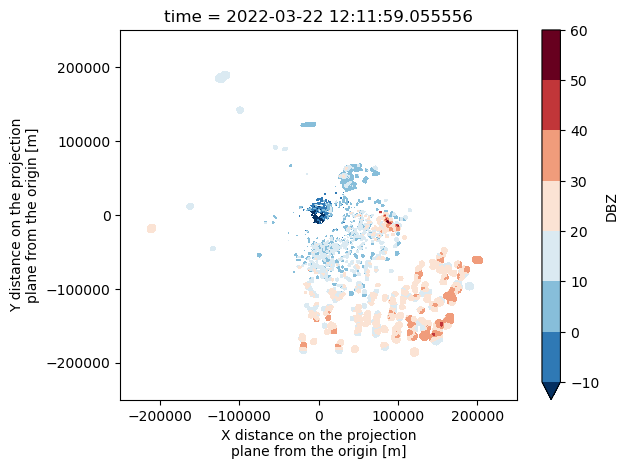

In [9]:
xg['DBZ'][0].max("z").plot.contourf(levels = range(-10, 70, 10))